In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.patches as mpatches
from sklearn.metrics import r2_score


def k_graph(segmented, start_year, sport, max_check = 4):

    """
    K explained in this article:
    https://www.pinnacle.com/en/betting-articles/Betting-Strategy/using-pythagorean-expectation-for-betting/8LX2CRDC6JVXWDAC

    Input:
        segmented - Root Mean Squared Error (RMSE) by year
        start_year - First year in dataset
        sport - Name of the sport to graph
        
    Output:
        Plot of RMSE for differing values of k for each given year
        Seasonal and average optimal values of k
    """
    
    mins = []
    colors = [np.random.rand(3,) for i in range(len(segmented))]
    years = np.arange(start_year, 2020)
    patches = []
    
    #Plots each year and adds it to a legend
    for year in range(len(segmented)):
        plt.plot(np.arange(0, max_check, step = 0.01), segmented[year], c = colors[year] )
        mins.append(0 + 0.01*segmented[year].index(min(segmented[year])))
        patches.append(mpatches.Patch(color=colors[year], label=years[year]))
        
    plt.xlabel("Value of K")
    plt.ylabel("RMSE")
    title = "RMSE of Predicting Next Season's Win % for " + sport
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc = "upper left", handles = patches)
    plt.show()
    
    #Displays seasonsal and average optimal values of k
    print("Seasonal optimal values of K -", mins)
    print("Average optimal value of K -", np.mean(mins))
    
    return(np.mean(mins))
    

def r_graph(pred, true, sport):
    
    """
    Input:
        pred - Predcited winning percentages
        true - Actual winning percentages
        sport - Name of the sport
    Output:
        Plot of predicted vs actual winning percentage
        Correlation between predicted and actual win percentages
    """

    corr = np.corrcoef(true, pred)
    r2 = r2_score(true, pred)
    
    plt.scatter(pred, true, c = "gray")
    plt.xlabel( "Predicted Win %")
    plt.ylabel("Actual Win %")
    title = "Scatter Plot of Predicted vs Actual Wins for " + sport
    plt.title(title)
    plt.show()

    print("Correlation =", corr[0][1])
    print("R^2 value =", corr[0][1]**2)


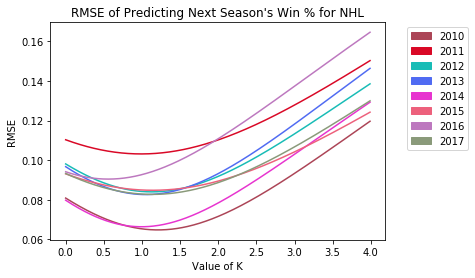

Seasonal optimal values of K - [1.21, 0.99, 1.1300000000000001, 1.05, 0.99, 1.1400000000000001, 0.56, 1.1400000000000001]
Average optimal value of K - 1.02625


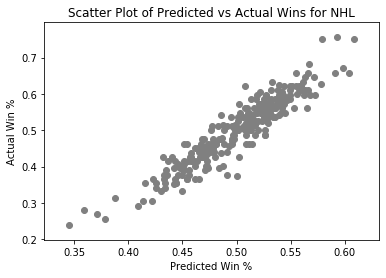

Correlation = 0.9372940726115483
R^2 value = 0.8785201785527423


In [2]:
"""
NHL Predictions
"""
nhl = pd.read_csv("NHL.csv", header = 0)

names = nhl['Team'].unique()
seasons = [20102011, 20112012, 20122013, 20132014, 20142015, 20152016, 20162017, 20172018, 20182019]

full_teams = [i for i in names if len(nhl[nhl['Team'] == i]) == 10]
seq = np.arange(0, 4, 0.01)

teams = nhl['Team'].to_numpy()
ind = [i for i in range(len(teams)) if teams[i] not in full_teams]
nhl = nhl.drop(ind)
segmented = [[] for i in range(len(seasons)-1)]

for i in range(len(seasons)-1):
    for j in range(len(seq)):
    
        prev_season = nhl[nhl['Season'] == seasons[i]]
        pred_season = nhl[nhl['Season'] == seasons[i+1]]
        
        pred = 1/(1 + (prev_season['GA']/prev_season['GF'])**seq[j])
        pred = pred.to_numpy()
        actual = (pred_season['W']/pred_season['GP'])
        
        error = math.sqrt( sum( (actual - pred)**2 )/len(pred) )
        segmented[i].append(error)
        
k = k_graph(segmented, 2010, "NHL")

overall_pred = 1/(1 + (nhl['GA']/nhl['GF'])**k)
overall_actual = nhl['W']/nhl['GP']

r_graph(overall_pred, overall_actual, "NHL")

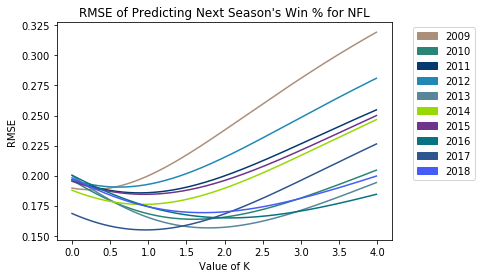

Seasonal optimal values of K - [0.24, 1.6, 0.89, 0.61, 1.79, 0.93, 0.9500000000000001, 2.06, 0.96, 1.72]
Average optimal value of K - 1.1750000000000003


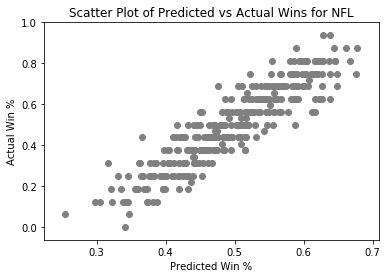

Correlation = 0.9109338878695447
R^2 value = 0.8298005480691242


In [9]:
"""
NFL Predictions
"""

nfl = pd.read_csv("NFL.csv", header = 0)
full_teams = [i for i in names if len(nfl[nfl['Tm'] == i]) == 11]
names = nfl['Tm'].unique()
seasons = np.arange(2009, 2020)
seq = np.arange(0, 4, 0.01)

teams = nfl['Tm'].to_numpy()
ind = [i for i in range(len(teams)) if teams[i] not in full_teams]
nfl = nfl.drop(ind)
segmented = [[] for i in range(len(seasons)-1)]

for i in range(len(seasons)-1):
    for j in range(len(seq)):
    
        prev_season = nfl[nfl['Year'] == seasons[i]]
        pred_season = nfl[nfl['Year'] == seasons[i+1]]
        
        pred = 1/(1 + (prev_season['PA']/prev_season['PF'])**seq[j])
        pred = pred.to_numpy()
        actual = pred_season['W-L%']
        error = math.sqrt( sum( (actual - pred)**2 )/len(pred) )
        segmented[i].append(error)
        
k = k_graph(segmented, 2009, "NFL")

overall_pred = 1/(1 + (nfl['PA']/nfl['PF'])**k)
overall_actual = nfl['W-L%']

r_graph(overall_pred, overall_actual, "NFL")

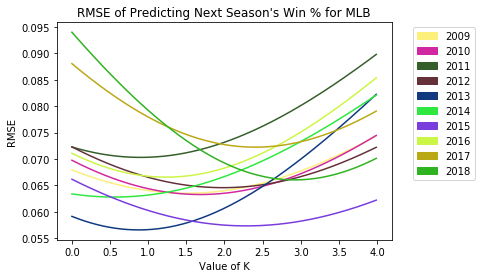

Seasonal optimal values of K - [1.5, 1.68, 0.9, 1.98, 0.87, 0.56, 2.29, 1.24, 2.4, 2.92]
Average optimal value of K - 1.634


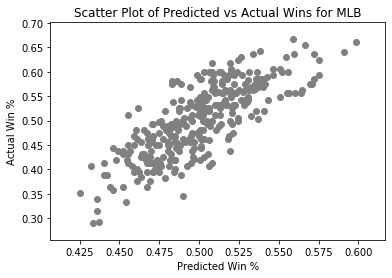

Correlation = 0.7905692906058487
R^2 value = 0.6249998032490348


In [11]:
"""
MLB Predictions
"""

mlb = pd.read_csv("MLB.csv", header = 0)
full_teams = [i for i in names if len(mlb[mlb['Tm'] == i]) == 11]
names = mlb['Tm'].unique()
seasons = np.arange(2009, 2020)
seq = np.arange(0, 4, 0.01)

teams = mlb['Tm'].to_numpy()
ind = [i for i in range(len(teams)) if teams[i] not in full_teams]
mlb = mlb.drop(ind)
segmented = [[] for i in range(len(seasons)-1)]

for i in range(len(seasons)-1):
    for j in range(len(seq)):
    
        prev_season = mlb[mlb['yr'] == seasons[i]]
        pred_season = mlb[mlb['yr'] == seasons[i+1]]
        
        pred = 1/(1 + (prev_season['H allowed']/prev_season['H'])**seq[j])
        pred = pred.to_numpy()
        actual = pred_season['W-L%']
        error = math.sqrt( sum( (actual - pred)**2 )/len(pred) )
        segmented[i].append(error)

k = k_graph(segmented, 2009, "MLB")

overall_pred = 1/(1 + (mlb['H allowed']/mlb['H'])**k)
overall_actual = mlb['W-L%']

r_graph(overall_pred, overall_actual, "MLB")

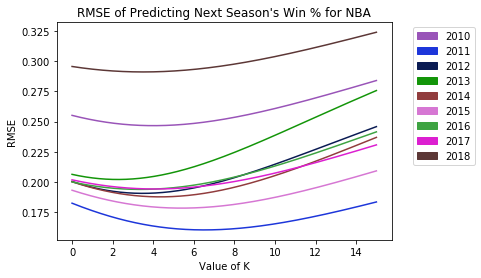

Seasonal optimal values of K - [4.01, 6.51, 3.48, 2.25, 4.3500000000000005, 5.39, 3.36, 4.08, 3.5100000000000002]
Average optimal value of K - 4.104444444444444


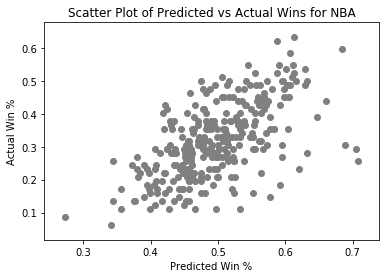

Correlation = 0.6011816843152112
R^2 value = 0.3614194175560743


In [15]:
"""
NBA Predictions
"""
nba = pd.read_csv("games.csv", header = 0)
nba = nba[nba['SEASON'] > 2009]

home = nba.groupby(['SEASON', "HOME_TEAM_ID"]).sum()
home = home.reset_index()

away = nba.groupby(['SEASON', "VISITOR_TEAM_ID"]).sum()
away = away.reset_index()
away = away[away['SEASON'] > 2009]

grouped = nba.groupby(['SEASON', "VISITOR_TEAM_ID", "HOME_TEAM_ID"]).sum()

seasons = np.arange(2010, 2020)
seq = np.arange(0, 15, 0.01)

segmented = [[] for i in range(len(seasons)-1)]

for i in range(len(seasons)-1):
    for j in range(len(seq)):
    
        prev_season_home = home[home['SEASON'] == seasons[i]]
        prev_season_away = away[away['SEASON'] == seasons[i]]
        pred_season = home[home['SEASON'] == seasons[i+1]]
        
        z = prev_season_away['PTS_home'].to_numpy()
        f = prev_season_home['PTS_home'].to_numpy()
        
        div = z/f
        
        pred = 1/(1 + (div)**seq[j])
        actual = pred_season['HOME_TEAM_WINS']/82
        error = math.sqrt( sum( (actual - pred)**2 )/len(pred) )
        segmented[i].append(error)

k = k_graph(segmented, 2010, "NBA", max_check = 15)

h = away['PTS_home'].to_numpy()
l = home['PTS_home'].to_numpy()

div = h/l

overall_pred = 1/(1 + (div)**k)
overall_actual = home['HOME_TEAM_WINS']/82
r_graph(overall_pred, overall_actual, "NBA")